# FitBod Workout Data Analysis

This notebook is to create a reproducible visualization with updated workout data exported from the app FitBod.

In [48]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
workouts = pd.read_csv('WorkoutExport.csv')
workouts.head()

,Date,Exercise,Reps,Weight(kg),Duration(s),Distance(m),Incline,Resistance,isWarmup,Note,multiplier
0,2021-01-17 22:14:35 +0000,Back Squat,4,20.411681,0.0,0.0,0.0,0.0,True,NaN,1.0
1,2021-01-17 22:14:35 +0000,Back Squat,2,31.751504,0.0,0.0,0.0,0.0,False,NaN,1.0
2,2021-01-17 22:14:35 +0000,Back Squat,2,38.555397,0.0,0.0,0.0,0.0,False,NaN,1.0
3,2021-01-17 22:14:35 +0000,Back Squat,8,45.359291,0.0,0.0,0.0,0.0,False,NaN,1.0
4,2021-01-17 22:14:35 +0000,Back Squat,8,45.359291,0.0,0.0,0.0,0.0,False,NaN,1.0


In [3]:
# Renaming columns that have parentheses in the names
workouts.rename(columns={'Weight(kg)': 'Weight_kg', 'Duration(s)': 'Duration_s', 'Distance(m)': 'Distance_m'}, inplace=True)

In [11]:
# Creating a new weight column in pounds since the data only provides kilograms
workouts['Weight_lbs'] = round(workouts.Weight_kg * 2.20462262, 1)

# Creating new column of total weight lifted during each set
workouts['lbs_lifted'] = workouts.Reps * workouts.Weight_lbs

Notes and changes to make:
- Convert date/time format
- Use date/time to create workout IDs to combine exercises into their workouts?
- Wtf is the multiplier
- Remove warmup exercises from the individual exercises
- Create a dictionary to convert the exercise type to their primary muscle group
- The first date that appears, '2019-07-29 23:04:34 +0000', has duplicate exercise entries, which blew up the first data point in plotting the total weight lifted in the barbell bench press

In [12]:
# Creating a list of the desired column order and then reordering the columns in the dataframe
column_order = ['Date', 'Exercise', 'Reps', 'Weight_kg', 'Weight_lbs', 'lbs_lifted', 'Duration_s', 'Distance_m',
                'Incline', 'Resistance', 'isWarmup', 'Note', 'multiplier']
workouts = pd.DataFrame(workouts, columns=column_order)

In [13]:
workouts.head()

,Date,Exercise,Reps,Weight_kg,Weight_lbs,lbs_lifted,Duration_s,Distance_m,Incline,Resistance,isWarmup,Note,multiplier
0,2021-01-17 22:14:35 +0000,Back Squat,4,20.411681,45.0,180.0,0.0,0.0,0.0,0.0,True,NaN,1.0
1,2021-01-17 22:14:35 +0000,Back Squat,2,31.751504,70.0,140.0,0.0,0.0,0.0,0.0,False,NaN,1.0
2,2021-01-17 22:14:35 +0000,Back Squat,2,38.555397,85.0,170.0,0.0,0.0,0.0,0.0,False,NaN,1.0
3,2021-01-17 22:14:35 +0000,Back Squat,8,45.359291,100.0,800.0,0.0,0.0,0.0,0.0,False,NaN,1.0
4,2021-01-17 22:14:35 +0000,Back Squat,8,45.359291,100.0,800.0,0.0,0.0,0.0,0.0,False,NaN,1.0


In [65]:
# Setting a visualization default. I use 'force dark mode' on Chrome which made the ticks invisible for me in the notebook
plt.style.use('default');

In [38]:
barbell_bench_press = workouts[workouts.Exercise == 'Barbell Bench Press']

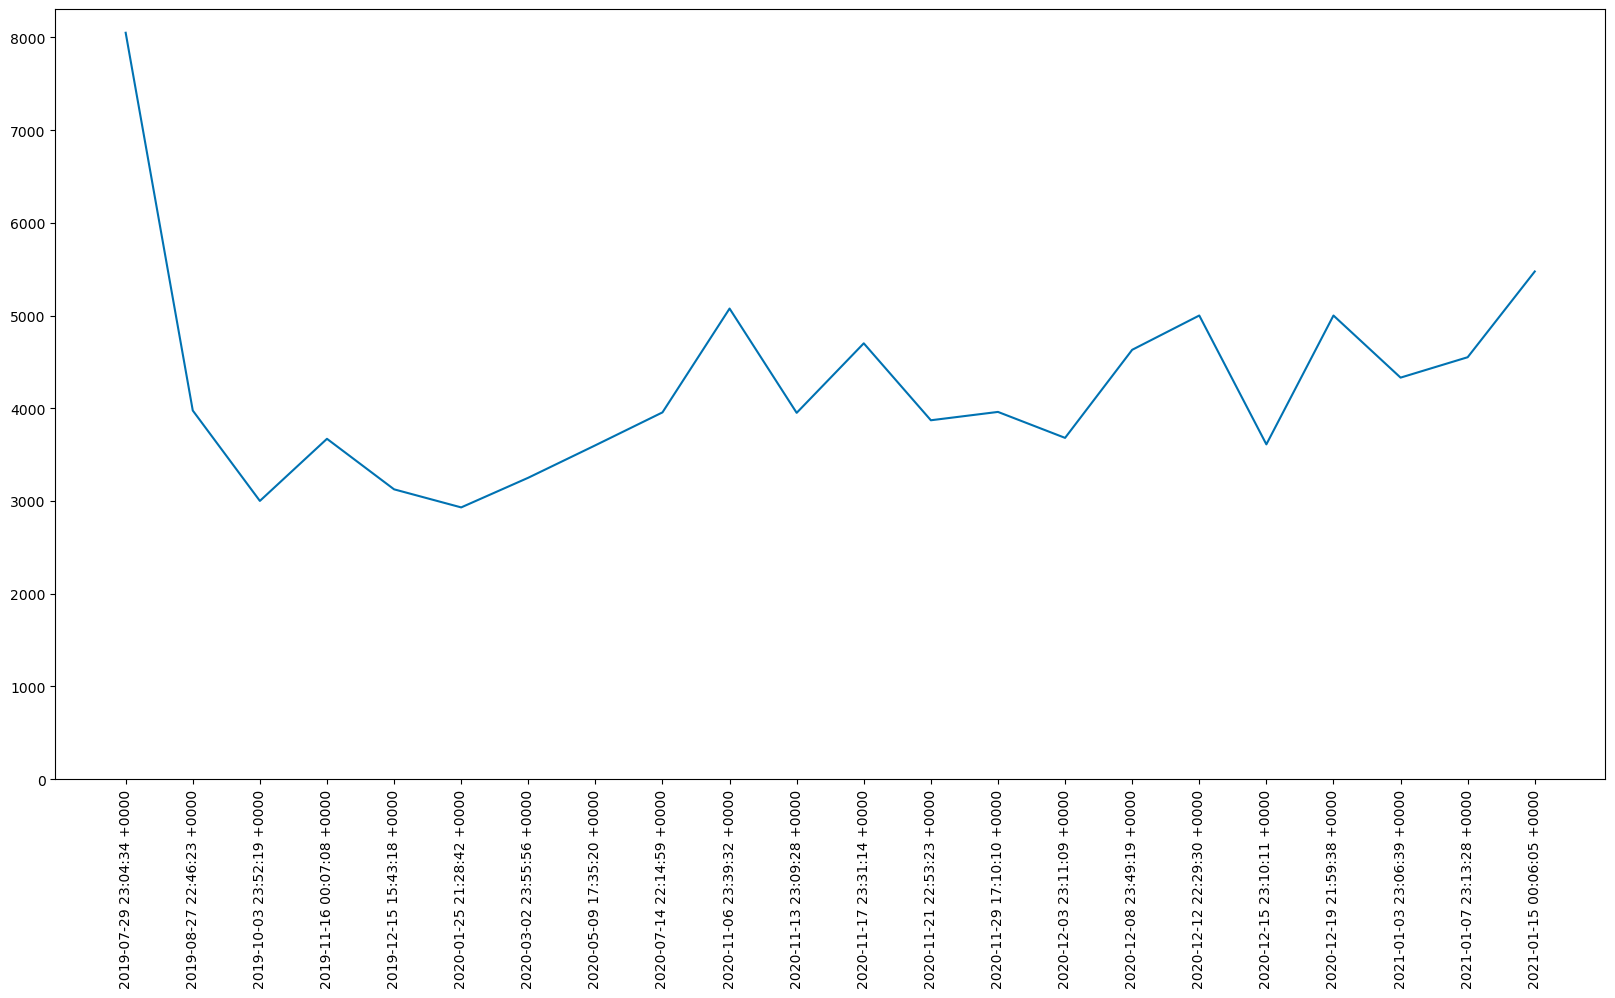

In [64]:
plot_data = barbell_bench_press.groupby('Date').lbs_lifted.sum()
plt.figure(figsize=[20,10])
plt.plot(plot_data.index, plot_data.values)
plt.yticks(ticks=np.arange(0, 9000, 1000))
plt.xticks(rotation=90);

In [61]:
barbell_bench_press.tail(20)

,Date,Exercise,Reps,Weight_kg,Weight_lbs,lbs_lifted,Duration_s,Distance_m,Incline,Resistance,isWarmup,Note,multiplier
7659,2019-10-03 23:52:19 +0000,Barbell Bench Press,5,54.431149,120.0,600.0,0.0,0.0,0.0,0.0,False,NaN,1.0
7660,2019-10-03 23:52:19 +0000,Barbell Bench Press,5,54.431149,120.0,600.0,0.0,0.0,0.0,0.0,False,NaN,1.0
7661,2019-10-03 23:52:19 +0000,Barbell Bench Press,5,54.431149,120.0,600.0,0.0,0.0,0.0,0.0,False,NaN,1.0
8010,2019-08-27 22:46:23 +0000,Barbell Bench Press,10,20.411681,45.0,450.0,0.0,0.0,0.0,0.0,True,NaN,1.0
8011,2019-08-27 22:46:23 +0000,Barbell Bench Press,5,34.019468,75.0,375.0,0.0,0.0,0.0,0.0,False,NaN,1.0
8012,2019-08-27 22:46:23 +0000,Barbell Bench Press,5,40.823362,90.0,450.0,0.0,0.0,0.0,0.0,False,NaN,1.0
8013,2019-08-27 22:46:23 +0000,Barbell Bench Press,15,45.359291,100.0,1500.0,0.0,0.0,0.0,0.0,False,NaN,1.0
8014,2019-08-27 22:46:23 +0000,Barbell Bench Press,12,45.359291,100.0,1200.0,0.0,0.0,0.0,0.0,False,NaN,1.0
8728,2019-07-29 23:04:34 +0000,Barbell Bench Press,10,20.411681,45.0,450.0,0.0,0.0,0.0,0.0,True,NaN,1.0
8729,2019-07-29 23:04:34 +0000,Barbell Bench Press,5,34.019468,75.0,375.0,0.0,0.0,0.0,0.0,True,NaN,1.0


In [62]:
first_workout = workouts[workouts.Date == '2019-07-29 23:04:34 +0000']
first_workout

,Date,Exercise,Reps,Weight_kg,Weight_lbs,lbs_lifted,Duration_s,Distance_m,Incline,Resistance,isWarmup,Note,multiplier
8724,2019-07-29 23:04:34 +0000,Dumbbell Shoulder Press,6,15.875752,35.0,210.0,0.0,0.0,0.0,0.0,False,NaN,2.0
8725,2019-07-29 23:04:34 +0000,Dumbbell Shoulder Press,6,15.875752,35.0,210.0,0.0,0.0,0.0,0.0,False,NaN,2.0
8726,2019-07-29 23:04:34 +0000,Dumbbell Shoulder Press,6,15.875752,35.0,210.0,0.0,0.0,0.0,0.0,False,NaN,2.0
8727,2019-07-29 23:04:34 +0000,Dumbbell Shoulder Press,6,15.875752,35.0,210.0,0.0,0.0,0.0,0.0,False,NaN,2.0
8728,2019-07-29 23:04:34 +0000,Barbell Bench Press,10,20.411681,45.0,450.0,0.0,0.0,0.0,0.0,True,NaN,1.0
8729,2019-07-29 23:04:34 +0000,Barbell Bench Press,5,34.019468,75.0,375.0,0.0,0.0,0.0,0.0,True,NaN,1.0
8730,2019-07-29 23:04:34 +0000,Barbell Bench Press,8,45.359291,100.0,800.0,0.0,0.0,0.0,0.0,False,NaN,1.0
8731,2019-07-29 23:04:34 +0000,Barbell Bench Press,8,45.359291,100.0,800.0,0.0,0.0,0.0,0.0,False,NaN,1.0
8732,2019-07-29 23:04:34 +0000,Barbell Bench Press,8,45.359291,100.0,800.0,0.0,0.0,0.0,0.0,False,NaN,1.0
8733,2019-07-29 23:04:34 +0000,Barbell Bench Press,8,45.359291,100.0,800.0,0.0,0.0,0.0,0.0,False,NaN,1.0
